## Modelos  Predicción de datos de Series Temporales.

## Trafico de Madrid. Calle Bravo Murillo
### (Estación de Aforo E19)

In [1]:
## realizamos predicción del tráfico diario en Bravo Murillo. Estación E19.
## Calle de datos en un sentido, en este tramo de medida.
## 

## Modelo 1. Exponential Smoothing.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
# buscamos el archivo con los datos y indexamos la fecha.
df = pd.read_csv('TrafE19BrMur1.csv')
df['FDIA']=pd.to_datetime(df['FDIA'])
df.set_index('FDIA',inplace=True)
df.head()

,ID
FDIA,
2020-01-01,18396.0
2020-01-02,30960.0
2020-01-03,32810.0
2020-01-04,25920.0
2020-01-05,31078.0


In [4]:
df.index.freq = 'D'
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2021-07-22', '2021-07-23', '2021-07-24', '2021-07-25',
               '2021-07-26', '2021-07-27', '2021-07-28', '2021-07-29',
               '2021-07-30', '2021-07-31'],
              dtype='datetime64[ns]', name='FDIA', length=578, freq='D')

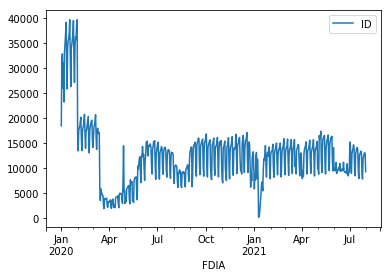

In [5]:
df.plot();

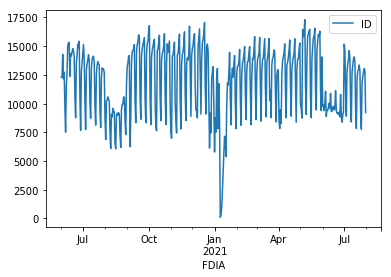

In [6]:
# para una predicción del mes siguiente al último que tenemos,
# no utilizamos los datos antes del 01/06/2021.
df1 = df.iloc[152:]
df1.plot();

In [7]:
len(df1)

426

In [15]:
train = df1.iloc[:395] 
test = df1.iloc[395:]
# el test en con los datos del mes de julio (31 días).

In [16]:
# generamos el modelo.

from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train['ID'],trend='add',seasonal='add', seasonal_periods=7).fit()

test_predictions = fitted_model.forecast(31)
test_predictions

2021-07-01     9968.012088
2021-07-02    10207.064820
2021-07-03     7163.803341
2021-07-04     4634.525461
2021-07-05     7727.443143
2021-07-06     8909.648896
2021-07-07     9408.455998
2021-07-08     9723.918216
2021-07-09     9962.970948
2021-07-10     6919.709469
2021-07-11     4390.431590
2021-07-12     7483.349271
2021-07-13     8665.555024
2021-07-14     9164.362126
2021-07-15     9479.824344
2021-07-16     9718.877077
2021-07-17     6675.615598
2021-07-18     4146.337718
2021-07-19     7239.255400
2021-07-20     8421.461153
2021-07-21     8920.268255
2021-07-22     9235.730472
2021-07-23     9474.783205
2021-07-24     6431.521726
2021-07-25     3902.243846
2021-07-26     6995.161528
2021-07-27     8177.367281
2021-07-28     8676.174383
2021-07-29     8991.636601
2021-07-30     9230.689333
2021-07-31     6187.427854
Freq: D, dtype: float64

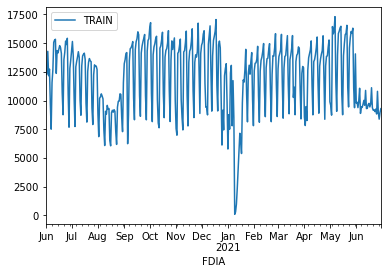

In [17]:
# pintamos los resultados en varias graficas para ver la previsión mejor.
train['ID'].plot(legend=True,label='TRAIN')

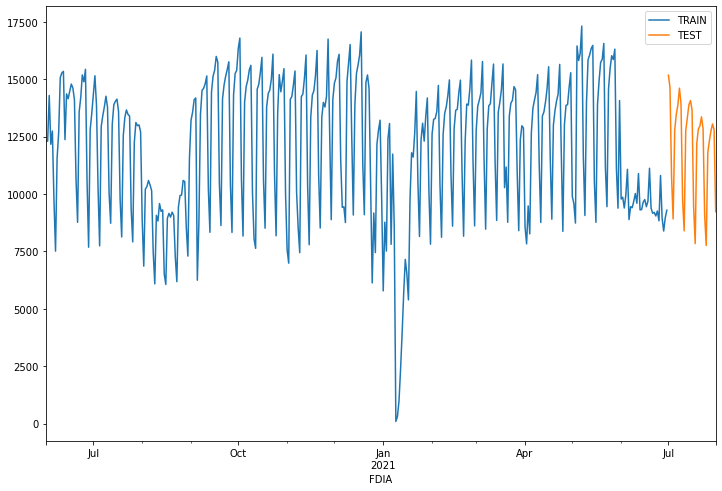

In [18]:
train['ID'].plot(legend=True,label='TRAIN',figsize=(12,8))
test['ID'].plot(legend=True,label='TEST')

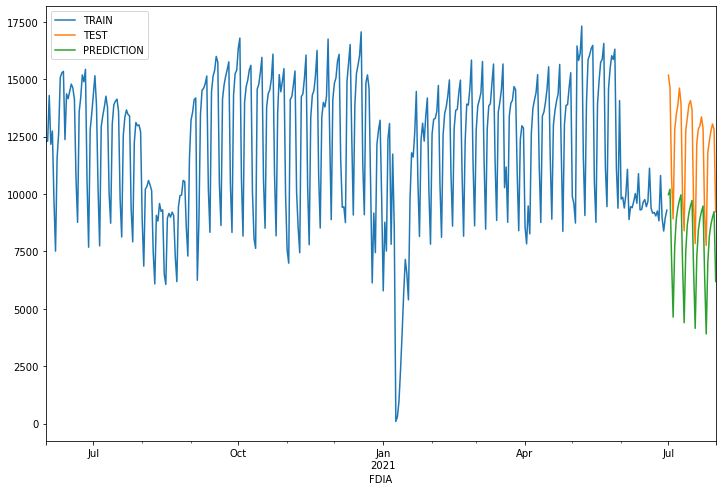

In [19]:
train['ID'].plot(legend=True,label='TRAIN',figsize=(12,8))
test['ID'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION');

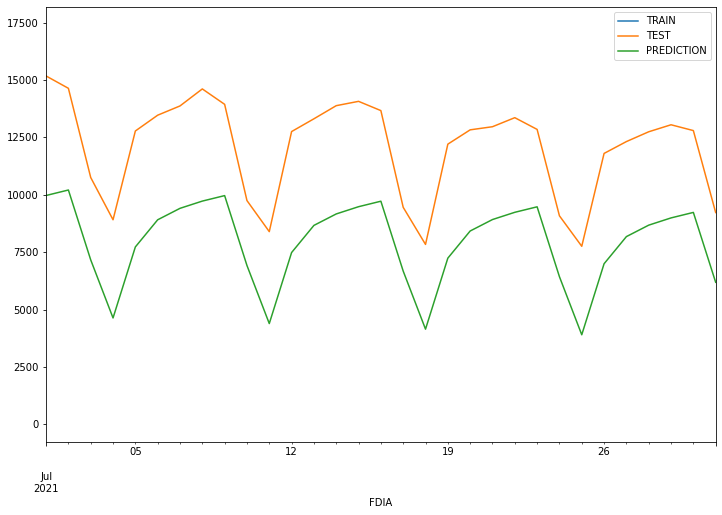

In [20]:
# pintamos los datos de predicción en el mes de julio.
train['ID'].plot(legend=True,label='TRAIN')
test['ID'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2021-07-01','2021-07-31']);

In [21]:
# evaluamos la métrica de los resultados.
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_absolute_error(test['ID'],test_predictions)

4127.786252723472

In [22]:
test['ID'].describe()

count       31.000000
mean     12070.806452
std       2163.138405
min       7756.000000
25%      10249.000000
50%      12795.000000
75%      13565.000000
max      15173.000000
Name: ID, dtype: float64

In [23]:
np.sqrt(mean_squared_error(test['ID'],test_predictions))

4185.095007679384

In [24]:
# error sqrt. respecto a la media del valor de los datos.
4128*100/12071

34.19766382238423

In [25]:
# el error en la predicción del test es del 34,2%, es alto para el tipo
# de datos que manejamos.
# la verdad que el problema del COVID y la estacionalidad de verano hace que
# sea dificil las series de predicción de tráfico este año.

In [26]:
# predecimos los datos con este modelo para agosto. con este error.

fitted_pred31 = ExponentialSmoothing(df1['ID'],trend='add',seasonal='add', seasonal_periods=7).fit()

pred31 = fitted_pred31.forecast(31)
pred31

2021-08-01     7304.923791
2021-08-02    11209.879570
2021-08-03    12273.311103
2021-08-04    12804.010608
2021-08-05    13092.395255
2021-08-06    13037.850512
2021-08-07     9096.986036
2021-08-08     7284.062114
2021-08-09    11189.017893
2021-08-10    12252.449426
2021-08-11    12783.148931
2021-08-12    13071.533578
2021-08-13    13016.988835
2021-08-14     9076.124359
2021-08-15     7263.200437
2021-08-16    11168.156216
2021-08-17    12231.587749
2021-08-18    12762.287254
2021-08-19    13050.671901
2021-08-20    12996.127159
2021-08-21     9055.262682
2021-08-22     7242.338761
2021-08-23    11147.294539
2021-08-24    12210.726072
2021-08-25    12741.425577
2021-08-26    13029.810224
2021-08-27    12975.265482
2021-08-28     9034.401006
2021-08-29     7221.477084
2021-08-30    11126.432862
2021-08-31    12189.864395
Freq: D, dtype: float64

In [28]:
# guardamos los datos de predicción de trafico en el mes de agosto.modelo 1.

pred31.to_csv('Pred08Mod1trafE19BM.csv')

## Modelo 2. SARIMAX

In [8]:
# al tener modelos más complejos, retiramos los avisos warnings.
import warnings
warnings.filterwarnings("ignore")

In [9]:
# los datos ya los tenemos en 'df', y del mismo modo trabajamos con 'df1'
# datos desde el 01/06/2020 (asi no influye la bajada de trafico del periodo de
# alarma de covid en marzo-abril-mayo de 2020)

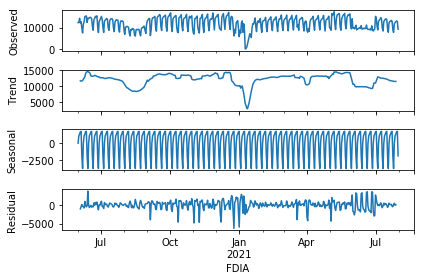

In [10]:
# representamos la descomposición estacional.
from statsmodels.tsa.seasonal import seasonal_decompose 

result = seasonal_decompose(df1['ID'])
result.plot();

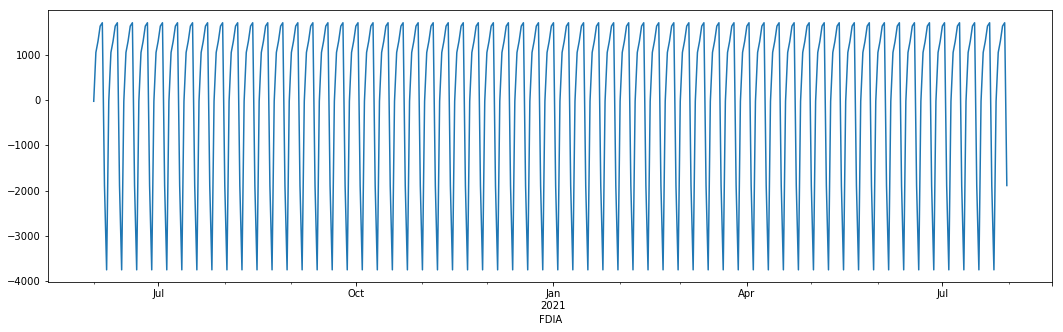

In [11]:
# puede que haya estacinalidad a nivel semanal.
result.seasonal.plot(figsize=(18,5));

In [12]:
len(df1)

426

In [19]:
# vamos a pronosticar los datos de julio2021. 31 días.
# realizamos los archivos de 'train' y 'test', este último es el mes de junio.
# retiramos datos antes de mayo2021, para que no influya los datos del covid.
train = df1.iloc[:395]
test = df1.iloc[395:]

In [20]:
# 1º pronostico. Modelo SARIMA. Obtenemos valores del modelo.
from pmdarima import auto_arima 

auto_arima(df1['ID'],seasonal=True,m=7).summary()

C:\Users\ahija\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ahija\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ahija\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ahija\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ahija\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  426
Model:             SARIMAX(1, 0, 3)x(2, 0, 0, 7)   Log Likelihood               -3766.216
Date:                           Sun, 12 Sep 2021   AIC                           7548.432
Time:                                   13:36:45   BIC                           7580.868
Sample:                                        0   HQIC                          7561.245
                                           - 426                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2645.8084    830.223      3.187      0.001    1018.602    4273.015
ar.L1          0.2159      0.200      1.080      0.280      -0.176       0.607
ma.L1          0.3936      0.203      1.938      0.053      -0.005       0.792
ma.L2          0.2073      0.106      1.962      0.050       0.000       0.414
ma.L3          0.2011      0.067      3.006      0.003       0.070       0.332
ar.S.L7        0.5193      0.042     12.261      0.000       0.436       0.602
ar.S.L14       0.2042      0.042      4.849      0.000       0.122       0.287
sigma2      2.744e+06   1.24e+05     22.053      0.000     2.5e+06    2.99e+06
===================================================================================
Ljung-Box (Q):                       69.98   Jarque-Bera (JB):               470.85
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                            -0.71
Prob(H) (two-sided):                  0.02   Kurtosis:                         7.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
# ahora generamos nuestro modelo utilizando los indicadores de SARIMAX.

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['ID'],order=(1,0,3),seasonal_order=(2,0,0,7),enforce_invertibility=False)
results = model.fit()
results.summary()

C:\Users\ahija\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                ID   No. Observations:                  395
Model:             SARIMAX(1, 0, 3)x(2, 0, 0, 7)   Log Likelihood               -3508.090
Date:                           Sun, 12 Sep 2021   AIC                           7030.181
Time:                                   13:37:05   BIC                           7058.033
Sample:                               06-01-2020   HQIC                          7041.216
                                    - 06-30-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7342      0.074      9.968      0.000       0.590       0.879
ma.L1         -0.1589      0.078     -2.045      0.041      -0.311      -0.007
ma.L2         -0.0395      0.056     -0.699      0.484      -0.150       0.071
ma.L3          0.1084      0.054      1.997      0.046       0.002       0.215
ar.S.L7        0.6354      0.040     16.028      0.000       0.558       0.713
ar.S.L14       0.3426      0.038      8.908      0.000       0.267       0.418
sigma2          3e+06   1.26e+05     23.775      0.000    2.75e+06    3.25e+06
===================================================================================
Ljung-Box (Q):                       86.09   Jarque-Bera (JB):               770.86
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.12   Skew:                            -1.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

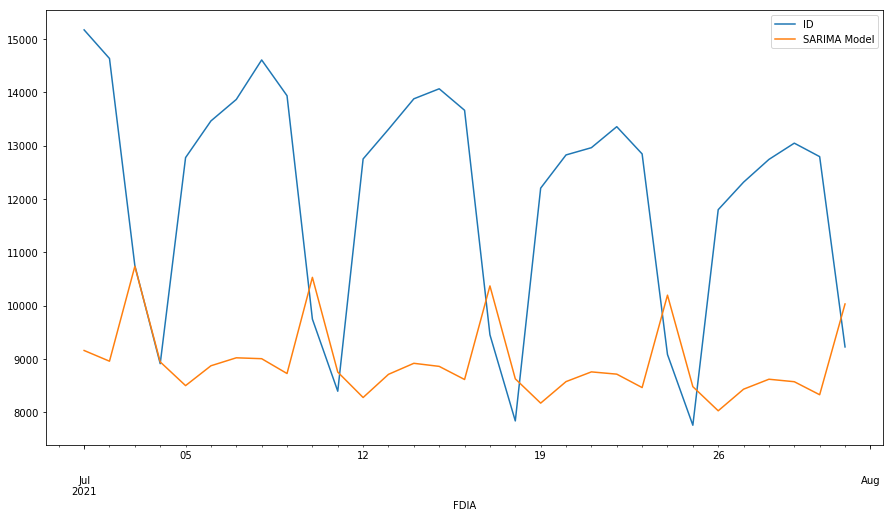

In [22]:
# predecimos los valores (últimos 31 dias, corresponde a datos de juLio)
start=len(train)
end=len(train)+len(test)-1

predictions = results.predict(start,end).rename('SARIMA Model')

# y lo pintamos junto a los datos reales del 'test'
test['ID'].plot(legend=True,figsize=(15,8))
predictions.plot(legend=True)

In [23]:
# evaluo las métricas de los resultados
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_absolute_error(test['ID'],predictions)

3493.6347520022778

In [24]:
test['ID'].describe()

count       31.000000
mean     12070.806452
std       2163.138405
min       7756.000000
25%      10249.000000
50%      12795.000000
75%      13565.000000
max      15173.000000
Name: ID, dtype: float64

In [25]:
np.sqrt(mean_squared_error(test['ID'],predictions))

3984.0780424903087

In [26]:
# error sqrt.
3984*100/12071

33.00472206113827

In [20]:
# el error en la predicción del test es del 33,0%, similar al modelo
# anterior
# la estacionalidad de verano hace dificil trabajar con estar predicciones. los m

# vamos a seguir estudiando otros modelos y elegimos aquel que nos de mejor
# predicción en el test, para realizar la PREDICCIÓN del MES siguiente: AGOSTO.

In [21]:
# predecimos los datos con este modelo para agosto. modelo 2.
dias= 31

model2 = SARIMAX(df1['ID'],order=(2,1,1),seasonal_order=(2,0,1,7),enforce_invertibility=False)
predic2 = model2.fit()
start=len(df1)
end=len(df1)+dias-1

predicmodel2 = predic2.predict(start,end).rename('SARIMA Model')
predicmodel2


2021-08-01     7903.312237
2021-08-02    11409.082723
2021-08-03    12195.395594
2021-08-04    12548.443929
2021-08-05    12990.394381
2021-08-06    12968.771658
2021-08-07     9981.317670
2021-08-08     8430.655508
2021-08-09    11660.811180
2021-08-10    12430.257562
2021-08-11    12694.142092
2021-08-12    13122.567618
2021-08-13    13128.380467
2021-08-14    10288.455117
2021-08-15     8657.859704
2021-08-16    11781.461638
2021-08-17    12530.998054
2021-08-18    12759.574590
2021-08-19    13175.640861
2021-08-20    13184.008347
2021-08-21    10392.968166
2021-08-22     8743.314645
2021-08-23    11822.396916
2021-08-24    12561.721981
2021-08-25    12778.200170
2021-08-26    13188.211983
2021-08-27    13196.564609
2021-08-28    10429.748583
2021-08-29     8780.803144
2021-08-30    11834.933709
2021-08-31    12568.249463
Freq: D, Name: SARIMA Model, dtype: float64

In [22]:
# guardamos los datos de predicción de trafico en el mes de agosto.modelo 2.

predicmodel2.to_csv('Pred08Mod2trafE19BM.csv')

## Modelo 3. RNN

In [7]:
# uso de redes neuronales para predecir datos de una serie temporal

# ya tengo la base de datos 'df', reducida a 'df1' para el trabajo.
df1.head()

,ID
FDIA,
2020-06-01,12306.0
2020-06-02,12298.0
2020-06-03,14290.0
2020-06-04,12163.0
2020-06-05,12741.0


In [8]:
# definimos nuestros paquetes de datos de entrenamiento y test.
# realmente ya los tenemos definidos de los modelos anteriores, pero por si acaso.
len(df1)

426

In [9]:
# tomamos 31 dias de test (7,3% de los datos)
train = df1.iloc[:395]
test = df1.iloc[395:]
test

,ID
FDIA,
2021-07-01,15173.0
2021-07-02,14636.0
2021-07-03,10751.0
2021-07-04,8911.0
2021-07-05,12777.0
2021-07-06,13465.0
2021-07-07,13868.0
2021-07-08,14609.0
2021-07-09,13938.0


In [10]:
# normalizamos los datos entre 0 y 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [11]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [12]:
# ahora generamos el modelo con RNN
from keras.preprocessing.sequence import TimeseriesGenerator
scaled_test

array([[0.87582762],
       [0.84463933],
       [0.61900337],
       [0.51213846],
       [0.73667093],
       [0.77662911],
       [0.80003485],
       [0.8430712 ],
       [0.80410036],
       [0.5606923 ],
       [0.48211174],
       [0.73521896],
       [0.76751074],
       [0.80073179],
       [0.8116506 ],
       [0.78824486],
       [0.54361714],
       [0.44976188],
       [0.7033918 ],
       [0.73957486],
       [0.74747357],
       [0.7703566 ],
       [0.74067836],
       [0.52212801],
       [0.4450575 ],
       [0.67992798],
       [0.70989662],
       [0.73469625],
       [0.75241027],
       [0.73771634],
       [0.53037519]])

In [13]:
# creamos el modelo.
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [14]:
# definimos el modelo RNN, con la estacionalidad semanal.
n_input = 7
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               91200     
_________________________________________________________________
dense (Dense)                (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit_generator(generator,epochs=25)

C:\Users\ahija\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
388/388 [==============================] - 2s 3ms/step - loss: 0.0411
Epoch 2/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0201
Epoch 3/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0170
Epoch 4/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0168
Epoch 5/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0151
Epoch 6/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0137
Epoch 7/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0131
Epoch 8/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0128
Epoch 9/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0128
Epoch 10/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0130
Epoch 11/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0129
Epoch 12/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0123
Epoch 13/25
388/388 [====

In [17]:
model.history.history.keys()

dict_keys(['loss'])

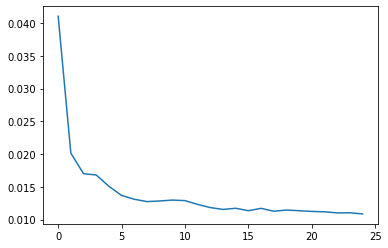

In [18]:
import matplotlib.pyplot as plt
plt.plot(range(len(model.history.history['loss'])),model.history.history['loss'])

In [19]:
# vemos que el error de predicción baja hasta 0

In [20]:
# hacemos ahora la predicción usando el modelo RNN
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    
    # y volvemos a ejecutar

In [21]:
# ahora tengo mis datos de test_predictions
test_predictions

[array([0.5937498], dtype=float32),
 array([0.6088259], dtype=float32),
 array([0.6729843], dtype=float32),
 array([0.6123488], dtype=float32),
 array([0.54566634], dtype=float32),
 array([0.5524774], dtype=float32),
 array([0.5854854], dtype=float32),
 array([0.6519318], dtype=float32),
 array([0.6955021], dtype=float32),
 array([0.73779875], dtype=float32),
 array([0.6919986], dtype=float32),
 array([0.5971973], dtype=float32),
 array([0.5798654], dtype=float32),
 array([0.6296243], dtype=float32),
 array([0.7108063], dtype=float32),
 array([0.7644374], dtype=float32),
 array([0.7984571], dtype=float32),
 array([0.76640904], dtype=float32),
 array([0.6486514], dtype=float32),
 array([0.6061641], dtype=float32),
 array([0.6703116], dtype=float32),
 array([0.76487577], dtype=float32),
 array([0.81732243], dtype=float32),
 array([0.8491326], dtype=float32),
 array([0.8368268], dtype=float32),
 array([0.70666206], dtype=float32),
 array([0.6372458], dtype=float32),
 array([0.70777535], d

In [22]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[10316.18442118],
       [10575.76472521],
       [11680.44371259],
       [10636.42155123],
       [ 9488.28299069],
       [ 9605.55620682],
       [10173.88759601],
       [11317.96211636],
       [12068.15519869],
       [12796.4188844 ],
       [12007.83191133],
       [10375.54301214],
       [10077.12238872],
       [10933.87132061],
       [12331.66304862],
       [13255.08276498],
       [13840.83410823],
       [13289.03084207],
       [11261.48016798],
       [10529.93343568],
       [11634.42564142],
       [13262.63100123],
       [14165.65765131],
       [14713.36506283],
       [14501.48386478],
       [12260.30732894],
       [11065.09774137],
       [12279.47605181],
       [14004.57182419],
       [14905.09128988],
       [15437.6457839 ]])

In [23]:
test['predictions'] = true_predictions

<ipython-input-23-fa6c3af7c69f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


In [24]:
test

,ID,predictions
FDIA,,
2021-07-01,15173.0,10316.184421
2021-07-02,14636.0,10575.764725
2021-07-03,10751.0,11680.443713
2021-07-04,8911.0,10636.421551
2021-07-05,12777.0,9488.282991
2021-07-06,13465.0,9605.556207
2021-07-07,13868.0,10173.887596
2021-07-08,14609.0,11317.962116
2021-07-09,13938.0,12068.155199


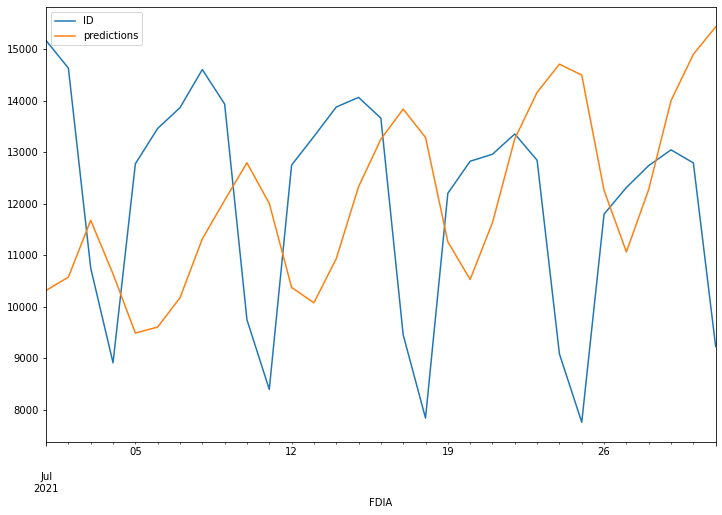

In [25]:
test.plot(figsize=(12,8))

In [26]:
# evaluo las métricas de los resultados
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_absolute_error(test['ID'],test['predictions'])

2728.7091608432033

In [27]:
test['ID'].describe()

count       31.000000
mean     12070.806452
std       2163.138405
min       7756.000000
25%      10249.000000
50%      12795.000000
75%      13565.000000
max      15173.000000
Name: ID, dtype: float64

In [28]:
np.sqrt(mean_squared_error(test['ID'],test['predictions']))

3261.3269642934415

In [29]:
# error sqrt.
3261*100/12070

27.017398508699255

In [36]:
# en este caso el error de predicción es menor, hasta un 27%.
# pero la visualización de datos en la gráfica no da confianza, la serie está
# desplazada y no sigue la predicción los datos del test.

## Modelo 4. Facebook's Prophet

In [30]:
# Usamos la bibliote de predicciones de la libreria de Facebook.
# diseñada para conjunto de datos comerciales comunes en Facebook.

In [31]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

Importing plotly failed. Interactive plots will not work.


In [32]:
# realizamos la carga del archivo
df = pd.read_csv('TrafE19BrMur1.csv')

In [33]:
# cambiamos la columna de FDIA al formato datatime y lo pasamos a indice, 
df.columns = ['ds','y']
df['ds']=pd.to_datetime(df['ds'])

In [34]:
df1 = df.iloc[152:]
df1.head()

,ds,y
152,2020-06-01,12306.0
153,2020-06-02,12298.0
154,2020-06-03,14290.0
155,2020-06-04,12163.0
156,2020-06-05,12741.0


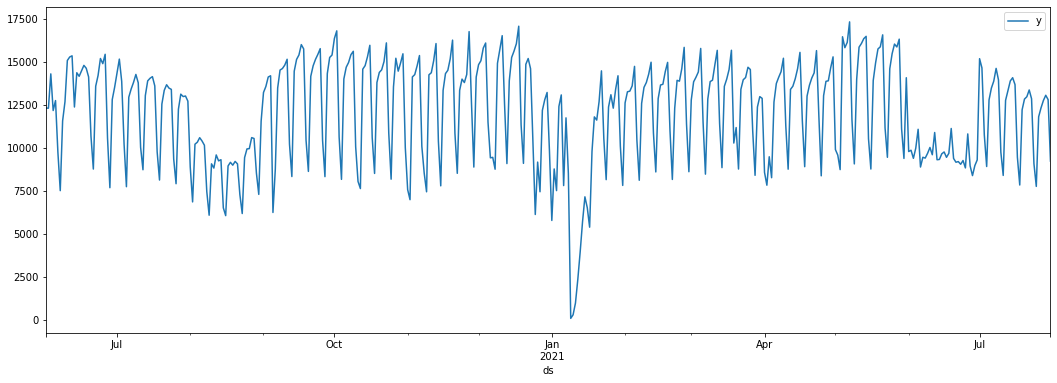

In [35]:
df1.plot(x='ds',y='y',figsize=(18,6))

In [36]:
len(df1)

426

In [37]:
train = df1.iloc[:395]
test = df1.iloc[395:]

In [38]:
# genero el modelo de predicción
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=31,freq='D')
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
421,2021-07-27,11824.577814,9847.828063,15988.233074,11821.881785,11827.532251,1040.827043,1040.827043,1040.827043,1040.827043,1040.827043,1040.827043,0.0,0.0,0.0,12865.404857
422,2021-07-28,11823.974867,10316.756525,16281.157145,11821.144639,11827.142078,1313.288735,1313.288735,1313.288735,1313.288735,1313.288735,1313.288735,0.0,0.0,0.0,13137.263602
423,2021-07-29,11823.371921,10711.703484,16612.954057,11820.359589,11826.705745,1584.669681,1584.669681,1584.669681,1584.669681,1584.669681,1584.669681,0.0,0.0,0.0,13408.041602
424,2021-07-30,11822.768974,10466.344568,16410.322900,11819.555339,11826.315890,1701.535763,1701.535763,1701.535763,1701.535763,1701.535763,1701.535763,0.0,0.0,0.0,13524.304737
425,2021-07-31,11822.166028,7012.612473,13084.415303,11818.767436,11825.961754,-1853.478506,-1853.478506,-1853.478506,-1853.478506,-1853.478506,-1853.478506,0.0,0.0,0.0,9968.687522


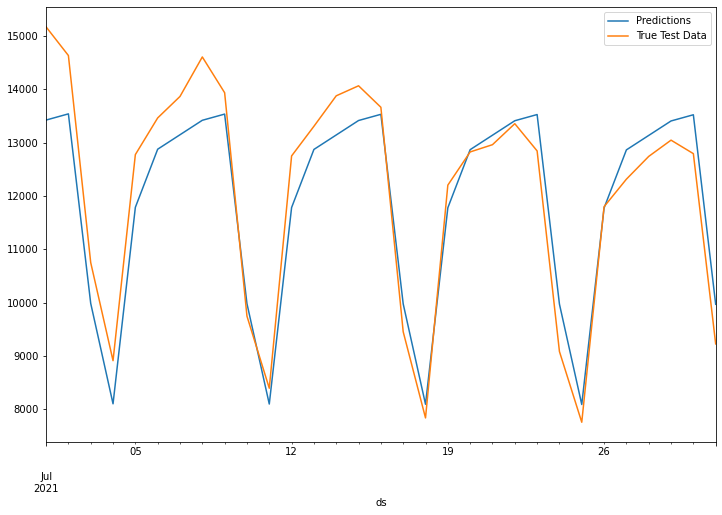

In [40]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True Test Data',legend=True,ax=ax,xlim=('2021-07-01','2021-07-31'))

In [41]:
# evaluamos la predicción
from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[-31:]['yhat']
predictions

395    13424.924103
396    13541.187239
397     9985.570024
398     8101.597312
399    11787.848191
400    12878.066733
401    13149.925478
402    13420.703478
403    13536.966614
404     9981.349398
405     8097.376687
406    11783.627566
407    12873.846108
408    13145.704853
409    13416.482852
410    13532.745988
411     9977.128773
412     8093.156061
413    11779.406940
414    12869.625483
415    13141.484228
416    13412.262227
417    13528.525363
418     9972.908148
419     8088.935436
420    11775.186315
421    12865.404857
422    13137.263602
423    13408.041602
424    13524.304737
425     9968.687522
Name: yhat, dtype: float64

In [42]:
test['y']

547    15173.0
548    14636.0
549    10751.0
550     8911.0
551    12777.0
552    13465.0
553    13868.0
554    14609.0
555    13938.0
556     9747.0
557     8394.0
558    12752.0
559    13308.0
560    13880.0
561    14068.0
562    13665.0
563     9453.0
564     7837.0
565    12204.0
566    12827.0
567    12963.0
568    13357.0
569    12846.0
570     9083.0
571     7756.0
572    11800.0
573    12316.0
574    12743.0
575    13048.0
576    12795.0
577     9225.0
Name: y, dtype: float64

In [43]:
rmse(predictions,test['y'])

689.9173173750751

In [44]:
test.mean()

y    12070.806452
dtype: float64

In [45]:
# % de error sobre la media (comparación valores)
690*100/12070

5.716652858326429

In [46]:
# la predicción del error es del 5,71%, es un valor muy bueno.
# al observar los valores.
# se ajusta mucho los valores predichos al test, parece que conoce la baja de
# datos de junio y que no influye para la predicción de datos en julio. 


## Predicción de datos de Agosto con Modelo 4. Prophet.

In [47]:
# calculo de predicción con este modelo.
m = Prophet()
m.fit(df1)
future_ago = m.make_future_dataframe(periods=31,freq='D')
forecast_ago = m.predict(future_ago)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
predictions_ago = forecast_ago.iloc[-31:]['yhat']
predictions_ago

426     8110.028568
427    11834.808732
428    12893.934640
429    13173.174448
430    13481.918017
431    13549.450526
432     9958.056822
433     8106.458773
434    11831.238937
435    12890.364845
436    13169.604653
437    13478.348222
438    13545.880731
439     9954.487027
440     8102.888978
441    11827.669141
442    12886.795050
443    13166.034858
444    13474.778427
445    13542.310936
446     9950.917232
447     8099.319183
448    11824.099346
449    12883.225255
450    13162.465063
451    13471.208632
452    13538.741141
453     9947.347437
454     8095.749388
455    11820.529551
456    12879.655460
Name: yhat, dtype: float64

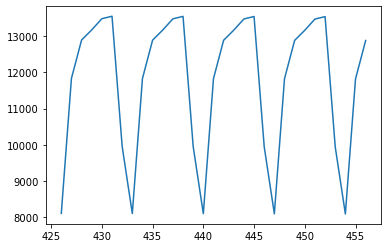

In [49]:
# representamos los valores de la predicción:
predictions_ago.plot()

In [51]:
# guardamos los datos de predicción de trafico en el mes de agosto.

predictions_ago.to_csv('Pred08Mod4trafE19BM.csv')

In [52]:
# trabajo terminado. Hemos utilizado 4 modelos y guardado 3 archivos para 
# visualizarlos despues y elegir el mejor para el uso de los datos predichos
# para el mes de agosto 2021.

In [44]:
# Trabajo de Mariano Ahijado García. TFM VIU. Master Big Data 2020-21.